# Modelo ARIMA

El modelo ARIMA es un modelo autoregresivo integrado de promedio movil. Utiliza variaciones y regresiones de datos para poder predecir en el futuro.

Hay tres terminos importantes en este modelo, los terminos p, d y q. 

P: Orden del termino autoregresivo (AR)
D: Orden de diferenciación (I)
Q: Orden del termino de media movil (MA)

Es importante saber que se ha de tratar de hacer la serie estacionaria, para ello hay que conocer el termino de diferenciación. El termino de diferenciacion sera 0 (d=0), cuando la serie sea totalmente estacionaria. En caso contrario, se ha de saber el orden para poder hacerla estacionaria.

## ¿Como se sabe el orden?

El orden se sabe usando la prueba ADF (Augmented Dickey Fuller). Esta prueba tiene como hipotesis nula -> Serie no estacionaria, por lo que si PValor > 0.05, entonces seguimos adelante con la diferenciación.


### Para ello vamos a probarlo en nuestro dataset real, el dataset de las vueltas de Checo Perez en Austria en los GP 2018-2021.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [4]:
vueltas = pd.read_csv("../datasets_completos/laps_Austria_PER_todas_vueltas.csv", header = 0)
vueltas.head()

,LapTime,LapNumber,Compound,TyreLife,FreshTyre,TrackStatus,Stint,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,pilotoDelante,tiempoPilotoDelante,pilotoDetras,tiempoPilotoDetras,posicionSalida,nextPit
0,0,1,NaN,NaN,NaN,1,NaN,22.7,False,38.1,47.4,13.0,sainz,1:18.889,leclerc,1:19.755,16.0,27
1,01:13.062,2,SUPERSOFT,1.0,True,2,1.0,22.7,False,37.4,47.4,13.0,stroll,1:13.397,gasly,1:13.059,16.0,27
2,01:11.715,3,SUPERSOFT,2.0,True,1,1.0,22.7,False,37.4,47.4,13.0,stroll,1:11.657,gasly,1:11.444,16.0,27
3,01:11.123,4,SUPERSOFT,3.0,True,1,1.0,22.8,False,37.6,47.3,13.0,stroll,1:11.195,gasly,1:11.165,16.0,27
4,01:11.171,5,SUPERSOFT,4.0,True,1,1.0,22.9,False,36.9,46.9,13.0,stroll,1:11.036,sirotkin,1:11.407,16.0,27


Text(0.5, 1.0, 'Grafico de las paradas a lo largo de todas las vueltas')

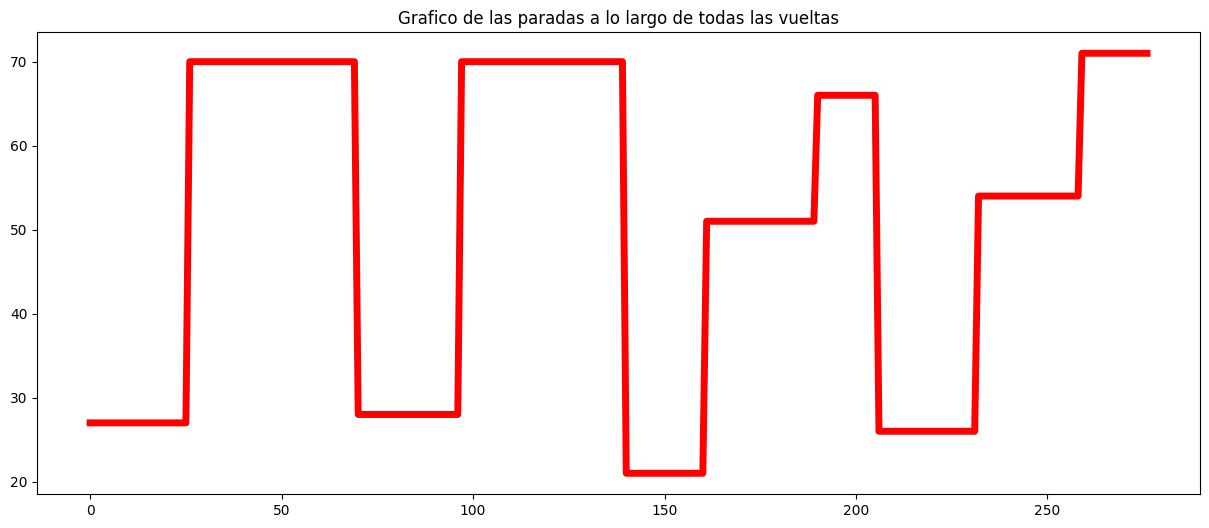

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(vueltas['nextPit'], lw=5, color="r")
plt.title("Grafico de las paradas a lo largo de todas las vueltas")

### Ahora procedemos a ver la estacionalidad de nuestro modelo

In [21]:
from statsmodels.tsa.stattools import adfuller
estacionalidad = adfuller(vueltas['nextPit'])
print("ADF estadístico: ", estacionalidad[0])
print("P-valor: ", estacionalidad[1])


ADF estadístico:  -2.796833353501025
P-valor:  0.0587275266358281


###  Dado que P-Valor > 0.05, se ha de diferenciar la serie

¿Pero no es muy poca la diferencia como para poder obviar esa diferencia que parece poco significativa?